## Second try at EDA on marathons. Attempting to recreate the chart I had created in Excel on Marathons

## Not successful here, either. Got stuck creating scatterplot to find outlier in 2019.

### Out of time on this project. Didn't complete all steps in pseudo-code.

<b>Pseudo-code</b> (after importing packages and dfs, and running .shape to confirm they look good)
1. Drop all non-finishers (with 00:00 time)   --DONE
2. Do scatter plot, or boxplot, to find the outlier in the full marathons (the half marathon finisher included there in error - I know it's in 2019, but I want to find it in Python)
    - Pop that runner out of full marathon, put into the correct half marathon
3. Find mean for each year, and mean across all 4 years for full and for half.
4. ?-Maybe add year and type (full/half) column to each year, and append dfs, so all data is in one df?
4. Show variance from mean as a percentage. Chart that percentage.

## Chart from Excel / Marathons project
- Compares average finish time per year, for full and half marathons, compared against average finish time for each race across all four years.
- Also shows high temperature for race day

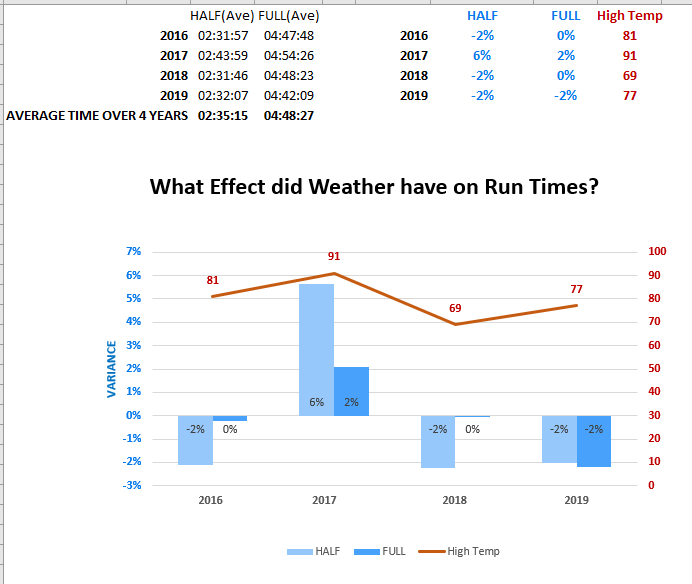

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#To read in all data files for exploration

full_2016_df = pd.read_csv('../data/full_2016.csv')
full_2017_df = pd.read_csv('../data/full_2017.csv')
full_2018_df = pd.read_csv('../data/full_2018.csv')
full_2019_df = pd.read_csv('../data/full_2019.csv')
half_2016_df = pd.read_csv('../data/half_2016.csv')
half_2017_df = pd.read_csv('../data/half_2017.csv')
half_2018_df = pd.read_csv('../data/half_2018.csv')
half_2019_df = pd.read_csv('../data/half_2019.csv')

In [3]:
#To confirm shape of each dataset - confirmed against marathons_webscraping notebook.

print("Full 2016: ", full_2016_df.shape)
print("Full 2017: ", full_2017_df.shape)
print("Full 2018: ", full_2018_df.shape)
print("Full 2019: ", full_2019_df.shape)
print("Half 2016: ", half_2016_df.shape)
print("Half 2017: ", half_2017_df.shape)
print("Half 2018: ", half_2018_df.shape)
print("Half 2019: ", half_2019_df.shape)

Full 2016:  (3842, 4)
Full 2017:  (3651, 4)
Full 2018:  (2115, 4)
Full 2019:  (2811, 4)
Half 2016:  (22429, 4)
Half 2017:  (22292, 4)
Half 2018:  (14940, 4)
Half 2019:  (17236, 4)


In [7]:
full_2016_df.tail()

,Overall,Bib,Name,Time
3837,99999,2052,Adam Pastors,00:00:00
3838,99999,4007,Andy Brooks,00:00:00
3839,99999,2107,Anastasiya Christiansen,00:00:00
3840,99999,11097,Douglas Reid,00:00:00
3841,99999,27234,Melinda Bennett,00:00:00


In [8]:
#To create new df with finishers only (removing all with time 00:00:00), starting with 2016 only

full_fin_2016_df = full_2016_df[full_2016_df.Time != '00:00:00']
full_fin_2016_df.tail()

,Overall,Bib,Name,Time
3668,99999,26003,Alyson Cook,06:27:05
3695,99999,3064,Susan Louis,02:49:02
3781,99999,20104,William Hanson,03:30:01
3810,99999,8099,Phillip Hickman,03:38:53
3816,99999,27141,Jessica Scott,06:49:41


In [9]:
full_fin_2016_df.shape

(2978, 4)

In [10]:
#To create new df with finishers only (removing all with time 00:00:00), for all remaining dfs
#Printing .shape to confirm that the # size is lower than original.

full_fin_2017_df = full_2017_df[full_2017_df.Time != '00:00:00']
full_fin_2018_df = full_2018_df[full_2018_df.Time != '00:00:00']
full_fin_2019_df = full_2019_df[full_2019_df.Time != '00:00:00']
half_fin_2016_df = half_2016_df[half_2016_df.Time != '00:00:00']
half_fin_2017_df = half_2017_df[half_2017_df.Time != '00:00:00']
half_fin_2018_df = half_2018_df[half_2018_df.Time != '00:00:00']
half_fin_2019_df = half_2019_df[half_2019_df.Time != '00:00:00']
print("Full 2016: ", full_fin_2016_df.shape)
print("Full 2017: ", full_fin_2017_df.shape)
print("Full 2018: ", full_fin_2018_df.shape)
print("Full 2019: ", full_fin_2019_df.shape)
print("Half 2016: ", half_fin_2016_df.shape)
print("Half 2017: ", half_fin_2017_df.shape)
print("Half 2018: ", half_fin_2018_df.shape)
print("Half 2019: ", half_fin_2019_df.shape)

Full 2016:  (2978, 4)
Full 2017:  (2595, 4)
Full 2018:  (2107, 4)
Full 2019:  (2025, 4)
Half 2016:  (17920, 4)
Half 2017:  (17712, 4)
Half 2018:  (14940, 4)
Half 2019:  (13706, 4)


In [17]:
half_fin_2019_df.tail()

,Overall,Bib,Name,Time
13701,13702,10899,Matthew Mcmullin,04:48:27
13702,13703,17926,Destinie Bean,04:57:21
13703,13704,1164,Katie Dillard,04:57:21
13704,13705,13216,Porsche Baileybrown,05:03:35
13705,13706,32779,Katy Martinez,05:52:56


TypeError: unsupported operand type(s) for /: 'str' and 'int'

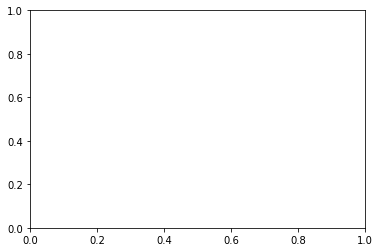

In [18]:
#Tried boxplot. 
#Got TypeError: unsupported operand type(s) for /: 'str' and 'int'

full_fin_2019_df.boxplot(column='Time', by='Name')